In [1]:
!pip install --upgrade pip
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [3]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        6.0.0
blis  

In [4]:
import tensorflow as tf
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [9]:
import cv2
import imghdr

In [10]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/braille detector/data' 

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


Image not in ext list /content/drive/MyDrive/Colab Notebooks/braille detector/data/not braille/63615938.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/braille detector/data/not braille/0ojtdsiub1upse3l.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/braille detector/data/not braille/colorful-circle-polkadot-abstract-background-260nw-1955744806.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/braille detector/data/not braille/background-polka-dot-seamless-pattern-260nw-1409346941.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/braille detector/data/not braille/88079671-seamless-multi-colored-polka-dots-background-vector.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/braille detector/data/not braille/depositphotos_11859339-stock-photo-seamless-bright-multi-polka-dot.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/braille detector/data/not braille/depositphotos_11250802-stock-illustratio

## 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/braille detector/data')

Found 2171 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
batch[1]
# sad ppl = 1
# happy ppl = 0

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

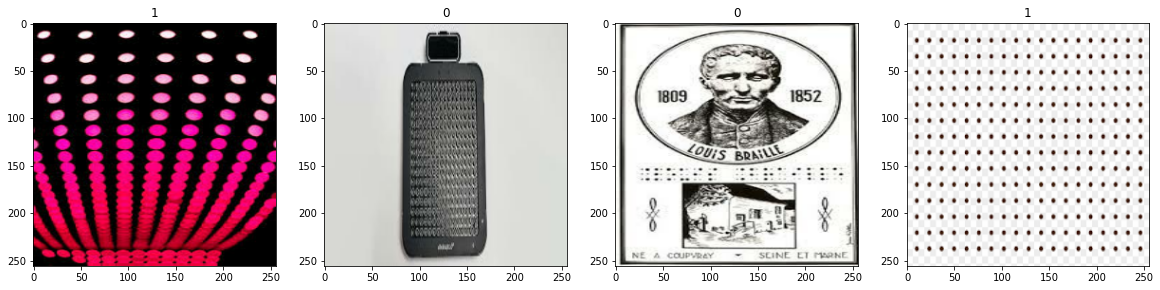

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 4. Scale Data

In [19]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [20]:
data.as_numpy_iterator().next()

(array([[[[0.9843137 , 0.98039216, 0.9607843 ],
          [0.9490119 , 0.94509035, 0.9254825 ],
          [0.9821921 , 0.9810049 , 0.96139705],
          ...,
          [0.95733   , 0.9534084 , 0.9338006 ],
          [0.9793199 , 0.9753983 , 0.95579046],
          [0.99215686, 0.9882353 , 0.96862745]],
 
         [[0.9811045 , 0.9771829 , 0.9575751 ],
          [0.9799449 , 0.9760233 , 0.9564155 ],
          [0.9938507 , 0.9926635 , 0.97305566],
          ...,
          [0.9761154 , 0.97219384, 0.952586  ],
          [0.9635619 , 0.9596403 , 0.9400325 ],
          [0.99215686, 0.9882353 , 0.96862745]],
 
         [[0.98039216, 0.9764706 , 0.95686275],
          [0.9868107 , 0.9828891 , 0.9632813 ],
          [0.9544935 , 0.95139974, 0.9317919 ],
          ...,
          [0.9932038 , 0.9911888 , 0.971581  ],
          [0.98467904, 0.9807575 , 0.96114963],
          [0.99215686, 0.9882353 , 0.96862745]],
 
         ...,
 
         [[1.        , 0.99607843, 0.9764706 ],
          [1.     

In [21]:
# 5. Split Data

## 5. Split Data

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size

47

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 6. Build Deep Learning Model

In [25]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 7. Train

In [31]:
logdir='/content/drive/MyDrive/Colab Notebooks/braille detector/logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
47/47 [==============================] - 23s 238ms/step - loss: 0.7144 - accuracy: 0.5691 - val_loss: 0.6343 - val_accuracy: 0.5529
Epoch 2/20
47/47 [==============================] - 12s 251ms/step - loss: 0.5824 - accuracy: 0.6722 - val_loss: 0.5587 - val_accuracy: 0.7308
Epoch 3/20
47/47 [==============================] - 11s 232ms/step - loss: 0.5014 - accuracy: 0.7420 - val_loss: 0.5224 - val_accuracy: 0.7356
Epoch 4/20
47/47 [==============================] - 11s 221ms/step - loss: 0.4149 - accuracy: 0.7945 - val_loss: 0.5319 - val_accuracy: 0.7332
Epoch 5/20
47/47 [==============================] - 11s 235ms/step - loss: 0.3419 - accuracy: 0.8491 - val_loss: 0.5067 - val_accuracy: 0.7861
Epoch 6/20
47/47 [==============================] - 12s 236ms/step - loss: 0.2466 - accuracy: 0.8943 - val_loss: 0.8399 - val_accuracy: 0.7524
Epoch 7/20
47/47 [==============================] - 10s 210ms/step - loss: 0.2477 - accuracy: 0.8810 - val_loss: 0.5782 - val_accuracy: 0.7885

## 8. Plot Performance

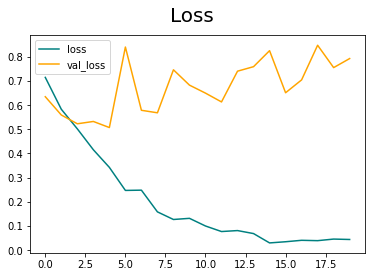

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

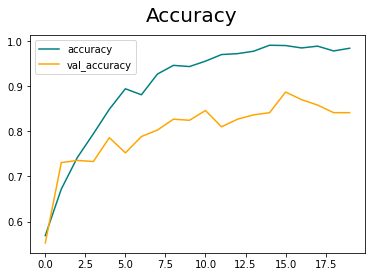

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 35ms/step


In [39]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.78350514, shape=(), dtype=float32) tf.Tensor(0.78350514, shape=(), dtype=float32) tf.Tensor(0.78125, shape=(), dtype=float32)


10. Test

In [40]:
import cv2

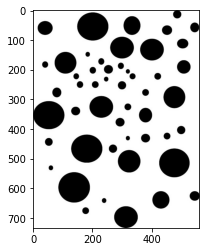

In [41]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/braille detector/e95c038308906782fb6b0e605de9cb1b.jpg')
plt.imshow(img)
plt.show()

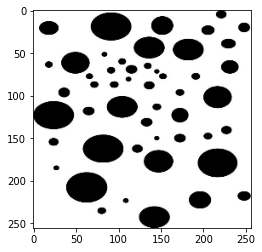

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 178ms/step


In [44]:
yhat

array([[0.99888426]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is not braille')
else:
    print(f'Predicted class is braille')

Predicted class is not braille


## 11. Save the Model

In [46]:
from tensorflow.keras.models import load_model

In [47]:
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/braille detector/models','brailleclassifierr1.h5'))

In [48]:
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/braille detector/models/brailleclassifierr1.h5')

In [49]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 80ms/step


array([[0.99888426]], dtype=float32)